In [49]:
from GLMClass import GLMProbitClass

from MLEClass import MaximumLikelihoodMethod

# from newMLE import MaximumLikelihoodMethod


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.interpolate import CubicSpline
import math 
import os 

from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
df = pd.read_csv('data/MSACollapseCountData.csv')
hazardLevel = np.array(df['Intensity Measure'])
df = df.drop('Intensity Measure', 1)
colNames = df.columns
numGM = np.array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45])

returnPeriod = [15, 25, 50, 75, 100, 150, 250, 500, 1000, 2500, 2700, 3000, 3300, 3500, 3700, 4000]
rate = [1/i for i in returnPeriod]

# df_hazard = pd.read_csv('HazardCurveExtendedFEMA.csv')
# rate = np.array(df_hazard['collapse Rate'])


In [51]:
temp2 = []
for i in colNames: 
    numCount = np.array(df['%s'%i])
    mleClass = MaximumLikelihoodMethod(hazardLevel, numCount, numGM, rate)
    temp2.append({'Building Name':i,
                 r'Median($\theta$)':mleClass.theta[0],
                 r'log-std($\beta$)':mleClass.theta[1],
                 r'Var[$\theta$]':mleClass.vcov_erf[0,0], #using error function 
                 r'Var[$\beta$]':mleClass.vcov_erf[1,1],
                 r'QVar[$\theta$]':mleClass.sandwich[0,0],
                 r'QVar[$\beta$]':mleClass.sandwich[1,1],
                 r'CoV_$\theta$': np.sqrt(mleClass.vcov_erf[0,0])/mleClass.theta[0],
                 r'CoV_$\beta$': np.sqrt(mleClass.vcov_erf[1,1])/mleClass.theta[1],
                 r'QCoV_$\theta$': np.sqrt(mleClass.sandwich[0,0])/mleClass.theta[0],
                 r'QCoV_$\beta$': np.sqrt(mleClass.sandwich[1,1])/mleClass.theta[1], 
                 r'MAFC($\lambda_c$)':mleClass.meanLambdaCollapse,
                 r'MLEStd[$\lambda_c$]':mleClass.MAFC(qmleTag = False),
                 r'QMLEStd[$\lambda_c$]':mleClass.MAFC(qmleTag = True),
                 '50yr_ProbCollapse':mleClass.getProbCollapse_years(numYear = 50),
                  'Var(lambdaCSimulated)':mleClass.varCollapseRate
        
    })
    
MLEresult = pd.DataFrame(temp2)
MLEresult.head(10)

,Building Name,Median($\theta$),log-std($\beta$),Var[$\theta$],Var[$\beta$],QVar[$\theta$],QVar[$\beta$],CoV_$\theta$,CoV_$\beta$,QCoV_$\theta$,QCoV_$\beta$,MAFC($\lambda_c$),MLEStd[$\lambda_c$],QMLEStd[$\lambda_c$],50yr_ProbCollapse,Var(lambdaCSimulated)
0,B1-Existing,1.219418,0.310060,0.001268,0.000645,0.000597,0.000363,0.029204,0.081906,0.020030,0.061453,0.002743,0.000281,2.859166e-11,0.128156,5.747241e-08
1,B1-Retrofit,3.145158,0.303274,0.006406,0.000681,0.001126,0.000158,0.025447,0.086060,0.010669,0.041398,0.000150,0.000017,1.307359e-10,0.007482,2.084493e-10
2,B2-Existing,2.381166,0.571759,0.008149,0.001566,0.004224,0.000794,0.037911,0.069203,0.027294,0.049295,0.000918,0.000166,6.123447e-11,0.044841,2.586024e-08
3,B2-Retrofit,4.446205,0.399264,0.030248,0.002418,0.011564,0.001869,0.039116,0.123154,0.024187,0.108277,0.000081,0.000013,8.048960e-12,0.004027,9.540849e-11
4,B3-Existing,0.812546,0.398092,0.000705,0.001059,0.000422,0.000298,0.032675,0.081760,0.025288,0.043391,0.007955,0.000715,2.148968e-10,0.328157,3.673196e-07
5,B3-Retrofit,2.730449,0.517434,0.009539,0.001502,0.003934,0.000504,0.035771,0.074899,0.022971,0.043408,0.000506,0.000099,7.342559e-11,0.024990,9.115555e-09
6,B4-Existing,1.406964,0.532839,0.002746,0.001108,0.000645,0.000345,0.037244,0.062459,0.018053,0.034870,0.003052,0.000384,3.732199e-11,0.141535,1.262903e-07
7,B4-Retoifit,2.671139,0.490573,0.008490,0.001333,0.004038,0.000655,0.034495,0.074432,0.023790,0.052177,0.000483,0.000092,8.308828e-12,0.023858,7.743527e-09


In [52]:
# os.chdir(r'/Users/laxmandahal/Desktop/UCLA/Phd/Research/201BProject_UQ/Paper/Revised Submission/images/')

In [53]:
os.getcwd()

'/Users/laxmandahal/Desktop/UCLA/Phd/Research/201BProject_UQ/Code_for_Github'

### Plot median values

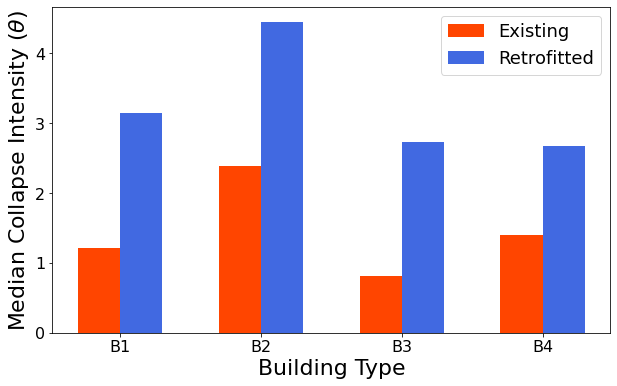

In [54]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'Median($\theta$)'][::2]
retrofit = MLEresult[r'Median($\theta$)'][1::2]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, existing, width, label='Existing', color = 'orangered')
rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted', color = 'royalblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Median Collapse Intensity ($\theta$)', fontsize = 22)
ax.set_xlabel('Building Type', fontsize = 22)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('theta.png')

### Plot lognormal standard deviation

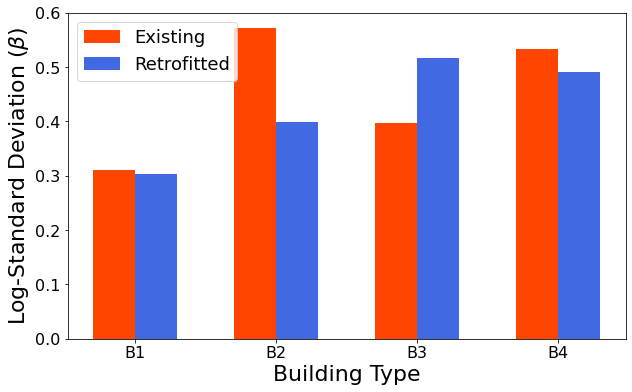

In [55]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'log-std($\beta$)'][::2]
retrofit = MLEresult[r'log-std($\beta$)'][1::2]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, existing, width, label='Existing', color = 'orangered')
rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted', color = 'royalblue')

ax.set_ylabel(r'Log-Standard Deviation ($\beta$)', fontsize = 22)
ax.set_xlabel('Building Type', fontsize = 22)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('beta.png')

### COV of median -MLE

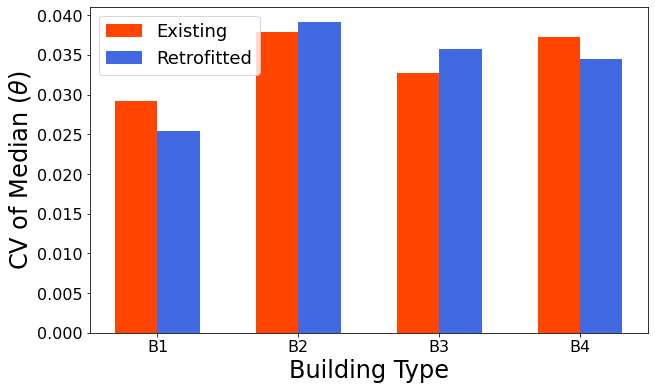

In [56]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'CoV_$\theta$'][::2]
retrofit = MLEresult[r'CoV_$\theta$'][1::2]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, existing, width, label='Existing', color = 'orangered')
rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted', color = 'royalblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'CV of Median ($\theta$)', fontsize = 24)
ax.set_xlabel('Building Type', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('covthetaMLE.png')

## Line plot

In [57]:
# labels = ['B1', 'B2', 'B3', 'B4']

# existing = MLEresult[r'CoV_$\theta$'][::2]
# retrofit = MLEresult[r'CoV_$\theta$'][1::2]

# x = np.arange(len(labels))  # the label locations

# fig, ax = plt.subplots(figsize = (10,6))
# ax.plot(x,existing, label = 'Existing', color = 'darkorange', marker = '^')
# ax.plot(x,retrofit, label='Retrofitted', color = 'darkgreen', marker = 'o')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# plt.ylabel(r'CV of Median ($\theta$)', fontsize = 24)
# ax.set_xlabel('Building Type', fontsize = 24)
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.tick_params(axis='both', which='major', labelsize=16)
# ax.yaxis.offsetText.set_fontsize(15)
# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=16)
# ax.legend(fontsize = 18)
# plt.savefig('covthetaMLE_LinePlot.png')

### COV of lognormal standard deviation -MLE

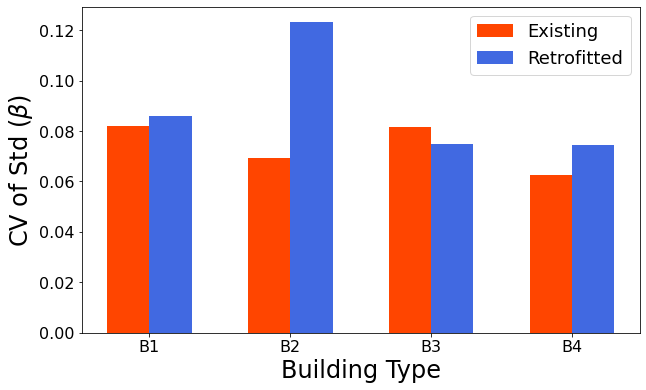

In [58]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'CoV_$\beta$'][::2]
retrofit = MLEresult[r'CoV_$\beta$'][1::2]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, existing, width, label='Existing', color = 'orangered')
rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted', color = 'royalblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'CV of Std ($\beta$)', fontsize = 24)
ax.set_xlabel('Building Type', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('covbetaMLE.png')

In [59]:
# labels = ['B1', 'B2', 'B3', 'B4']

# existing = MLEresult[r'CoV_$\beta$'][::2]
# retrofit = MLEresult[r'CoV_$\beta$'][1::2]

# x = np.arange(len(labels))  # the label locations

# fig, ax = plt.subplots(figsize = (10,6))
# ax.plot(x,existing, label = 'Existing', color = 'darkorange', marker = '^')
# ax.plot(x,retrofit, label='Retrofitted', color = 'darkgreen', marker = 'o')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# plt.ylabel(r'CV of Standard Deviation ($\beta$)', fontsize = 22)
# ax.set_xlabel('Building Type', fontsize = 24)
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.tick_params(axis='both', which='major', labelsize=16)
# ax.yaxis.offsetText.set_fontsize(15)
# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=16)
# ax.legend(fontsize = 18)
# plt.savefig('covbetaMLE_LinePlot.png')

In [60]:
theta_all = MLEresult[r'Median($\theta$)']
beta_all = MLEresult[r'log-std($\beta$)']

var_theta_all = MLEresult[r'Var[$\theta$]']
var_beta_all = MLEresult[r'Var[$\beta$]']

var_beta_all


0    0.000645
1    0.000681
2    0.001566
3    0.002418
4    0.001059
5    0.001502
6    0.001108
7    0.001333
Name: Var[$\beta$], dtype: float64

In [61]:

var_theta_all_qmle = MLEresult[r'QVar[$\theta$]']
var_beta_all_qmle = MLEresult[r'QVar[$\beta$]']

var_beta_all_qmle

0    0.000363
1    0.000158
2    0.000794
3    0.001869
4    0.000298
5    0.000504
6    0.000345
7    0.000655
Name: QVar[$\beta$], dtype: float64

In [62]:
# os.getcwd()

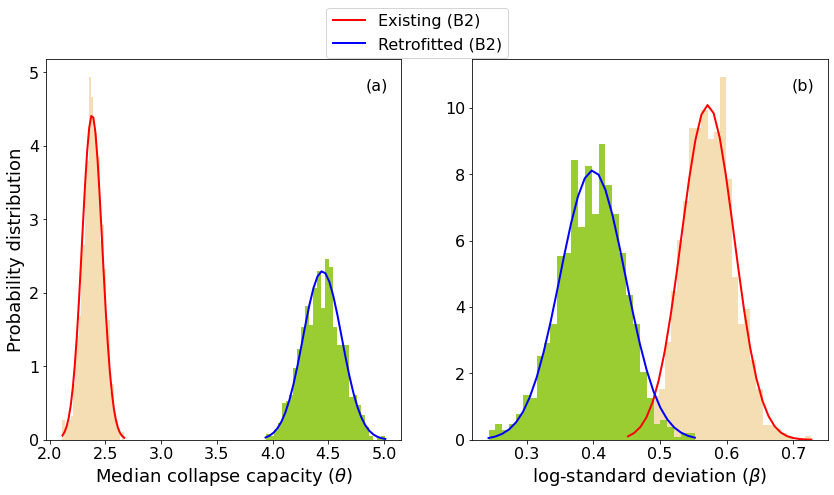

In [63]:
buildingNo = 3      #options are: 1, 3, 5, 7

theta = theta_all[buildingNo -1]
beta = beta_all[buildingNo -1]

Var_theta = var_theta_all[buildingNo -1]
Var_beta = var_beta_all[buildingNo -1]

##### retrofitted buildings
theta_retro = theta_all[buildingNo]
beta_retro = beta_all[buildingNo]

Var_theta_retro = var_theta_all[buildingNo]
Var_beta_retro = var_beta_all[buildingNo]


s_theta = np.random.normal(theta, np.sqrt(Var_theta), 1000)
s_beta = np.random.normal(beta, np.sqrt(Var_beta), 1000)

s_theta_r = np.random.normal(theta_retro, np.sqrt(Var_theta_retro), 1000)
s_beta_r = np.random.normal(beta_retro, np.sqrt(Var_beta_retro), 1000)


fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(14)
count, bins, ignored = ax1.hist(s_theta, 30, density=True, histtype = 'bar', facecolor = 'wheat')
ax1.plot(bins, 1/(np.sqrt(Var_theta) * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta)**2 / (2 * Var_theta) ),
         linewidth=2, label = 'Existing (B%s)'%(int(buildingNo/2)+1), color='r')
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
count, bins, ignored = ax1.hist(s_theta_r, 30, density=True, histtype = 'bar', facecolor = 'yellowgreen')
ax1.plot(bins, 1/(np.sqrt(Var_theta_retro) * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta_retro)**2 / (2 * Var_theta_retro) ),
         linewidth=2, color='b', label = 'Retrofitted (B%s)'% (int(buildingNo/2)+1))
# ax1.set_title(r'A PDF of median, $\theta$', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax1.set_xlabel(r'Median collapse capacity ($\theta$)',fontsize = 18 )
ax1.set_ylabel(r'Probability distribution',fontsize = 18 )
count, bins, ignored = ax2.hist(s_beta, 30, density=True, histtype = 'bar', facecolor = 'wheat')
ax2.plot(bins, 1/(np.sqrt(Var_beta) * np.sqrt(2 * np.pi)) * np.exp( - (bins - beta)**2 / (2 * Var_beta) ),
         linewidth=2, color='r')
count, bins, ignored = ax2.hist(s_beta_r, 30, density=True, histtype = 'bar', facecolor = 'yellowgreen')
ax2.plot(bins, 1/(np.sqrt(Var_beta_retro) * np.sqrt(2 * np.pi)) * np.exp( - (bins - beta_retro)**2 / (2 * Var_beta_retro) ),
         linewidth=2, color='b')
# ax2.plot(bins, norm.pdf())
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.set_xlabel(r'log-standard deviation ($\beta$)',fontsize = 18)
# ax2.set_title(r'A PDF of dispersion, $\beta$', fontdict={'fontsize': 18, 'fontweight': 'medium'})

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',fontsize = 16)
ax1.text(0.90, 0.92, '(a)',fontsize = 16, transform=ax1.transAxes)
ax2.text(0.90, 0.92, '(b)',fontsize = 16, transform=ax2.transAxes)
fig.savefig('parameterDistribution_%s.png'%(int(buildingNo/2)+1))

In [64]:
# buildingNo = 3      #options are: 1, 3, 5, 7

# theta = theta_all[buildingNo -1]
# beta = beta_all[buildingNo -1]

# Var_theta = var_theta_all_qmle[buildingNo -1]
# Var_beta = var_beta_all_qmle[buildingNo -1]

# ##### retrofitted buildings
# theta_retro = theta_all[buildingNo]
# beta_retro = beta_all[buildingNo]

# Var_theta_retro = var_theta_all_qmle[buildingNo]
# Var_beta_retro = var_beta_all_qmle[buildingNo]


# s_theta = np.random.normal(theta, np.sqrt(Var_theta), 1000)
# s_beta = np.random.normal(beta, np.sqrt(Var_beta), 1000)

# s_theta_r = np.random.normal(theta_retro, np.sqrt(Var_theta_retro), 1000)
# s_beta_r = np.random.normal(beta_retro, np.sqrt(Var_beta_retro), 1000)


# fig, (ax1, ax2) = plt.subplots(1,2)
# fig.set_figheight(7)
# fig.set_figwidth(14)
# count, bins, ignored = ax1.hist(s_theta, 30, density=True, histtype = 'bar', facecolor = 'wheat')
# ax1.plot(bins, 1/(np.sqrt(Var_theta) * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta)**2 / (2 * Var_theta) ),
#          linewidth=2, label = 'Existing (B%s)'%(int(buildingNo/2)+1), color='r')
# ax1.xaxis.set_tick_params(labelsize=16)
# ax1.yaxis.set_tick_params(labelsize=16)
# count, bins, ignored = ax1.hist(s_theta_r, 30, density=True, histtype = 'bar', facecolor = 'yellowgreen')
# ax1.plot(bins, 1/(np.sqrt(Var_theta_retro) * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta_retro)**2 / (2 * Var_theta_retro) ),
#          linewidth=2, color='b', label = 'Retrofitted (B%s)'% (int(buildingNo/2)+1))
# # ax1.set_title(r'A PDF of median, $\theta$', fontdict={'fontsize': 18, 'fontweight': 'medium'})
# ax1.set_xlabel(r'Median collapse capacity ($\theta$)',fontsize = 18 )
# ax1.set_ylabel(r'Probability distribution',fontsize = 18 )
# count, bins, ignored = ax2.hist(s_beta, 30, density=True, histtype = 'bar', facecolor = 'wheat')
# ax2.plot(bins, 1/(np.sqrt(Var_beta) * np.sqrt(2 * np.pi)) * np.exp( - (bins - beta)**2 / (2 * Var_beta) ),
#          linewidth=2, color='r')
# count, bins, ignored = ax2.hist(s_beta_r, 30, density=True, histtype = 'bar', facecolor = 'yellowgreen')
# ax2.plot(bins, 1/(np.sqrt(Var_beta_retro) * np.sqrt(2 * np.pi)) * np.exp( - (bins - beta_retro)**2 / (2 * Var_beta_retro) ),
#          linewidth=2, color='b')
# # ax2.plot(bins, norm.pdf())
# ax2.xaxis.set_tick_params(labelsize=16)
# ax2.yaxis.set_tick_params(labelsize=16)
# ax2.set_xlabel(r'log-standard deviation ($\beta$)',fontsize = 18)
# # ax2.set_title(r'A PDF of dispersion, $\beta$', fontdict={'fontsize': 18, 'fontweight': 'medium'})

# handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center',fontsize = 16)
# ax1.text(0.90, 0.92, '(a)',fontsize = 16, transform=ax1.transAxes)
# ax2.text(0.90, 0.92, '(b)',fontsize = 16, transform=ax2.transAxes)
# fig.savefig('parameterDistribution_%s.png'%(int(buildingNo/2)+1))

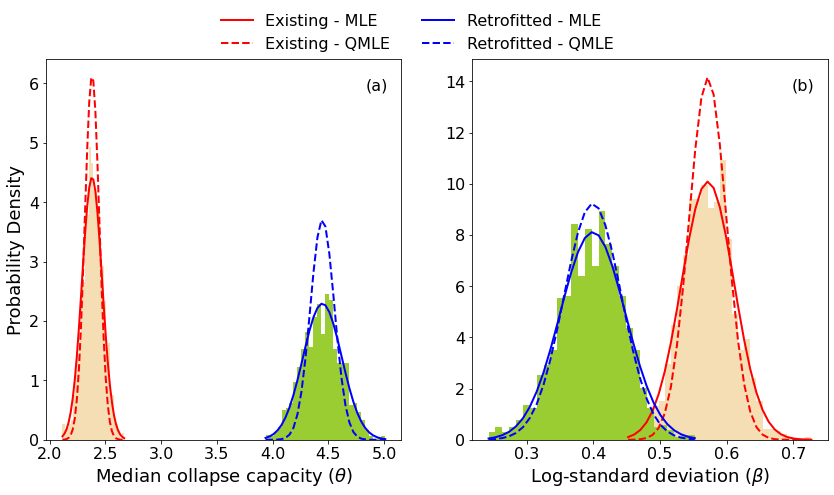

In [65]:
buildingNo = 3      #options are: 1, 3, 5, 7

theta = theta_all[buildingNo -1]
beta = beta_all[buildingNo -1]

Var_theta_qmle = var_theta_all_qmle[buildingNo -1]
Var_beta_qmle = var_beta_all_qmle[buildingNo -1]

##### retrofitted buildings
theta_retro = theta_all[buildingNo]
beta_retro = beta_all[buildingNo]

Var_theta_retro_qmle = var_theta_all_qmle[buildingNo]
Var_beta_retro_qmle = var_beta_all_qmle[buildingNo]


s_theta_qmle = np.random.normal(theta, np.sqrt(Var_theta_qmle), 1000)
s_beta_qmle = np.random.normal(beta, np.sqrt(Var_beta_qmle), 1000)

s_theta_r_qmle = np.random.normal(theta_retro, np.sqrt(Var_theta_retro_qmle), 1000)
s_beta_r_qmle = np.random.normal(beta_retro, np.sqrt(Var_beta_retro_qmle), 1000)


fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(14)
count, bins, ignored = ax1.hist(s_theta, 30, density=True, histtype = 'bar', facecolor = 'wheat')
ax1.plot(bins, 1/(np.sqrt(Var_theta) * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta)**2 / (2 * Var_theta) ),
         linewidth=2, label = 'Existing - MLE', color='r')
ax1.plot(bins, 1/(np.sqrt(Var_theta_qmle) * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta)**2 / (2 * Var_theta_qmle) ),
         linewidth=2, label = 'Existing - QMLE', linestyle = '--', color='r')
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
count, bins, ignored = ax1.hist(s_theta_r, 30, density=True, histtype = 'bar', facecolor = 'yellowgreen')
ax1.plot(bins, 1/(np.sqrt(Var_theta_retro) * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta_retro)**2 / (2 * Var_theta_retro) ),
         linewidth=2, color='b', label = 'Retrofitted - MLE')
ax1.plot(bins, 1/(np.sqrt(Var_theta_retro_qmle) * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta_retro)**2 / (2 * Var_theta_retro_qmle) ),
         linewidth=2, color='b',linestyle = '--', label = 'Retrofitted - QMLE')
# ax1.set_title(r'A PDF of median, $\theta$', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax1.set_xlabel(r'Median collapse capacity ($\theta$)',fontsize = 18 )
ax1.set_ylabel(r'Probability Density',fontsize = 18 )
count, bins, ignored = ax2.hist(s_beta, 30, density=True, histtype = 'bar', facecolor = 'wheat')
ax2.plot(bins, 1/(np.sqrt(Var_beta) * np.sqrt(2 * np.pi)) * np.exp( - (bins - beta)**2 / (2 * Var_beta) ),
         linewidth=2, color='r')
ax2.plot(bins, 1/(np.sqrt(Var_beta_qmle) * np.sqrt(2 * np.pi)) * np.exp( - (bins - beta)**2 / (2 * Var_beta_qmle) ),
         linewidth=2,linestyle = '--', color='r')
count, bins, ignored = ax2.hist(s_beta_r, 30, density=True, histtype = 'bar', facecolor = 'yellowgreen')
ax2.plot(bins, 1/(np.sqrt(Var_beta_retro) * np.sqrt(2 * np.pi)) * np.exp( - (bins - beta_retro)**2 / (2 * Var_beta_retro) ),
         linewidth=2, color='b')
ax2.plot(bins, 1/(np.sqrt(Var_beta_retro_qmle) * np.sqrt(2 * np.pi)) * np.exp( - (bins - beta_retro)**2 / (2 * Var_beta_retro_qmle) ),
         linewidth=2,linestyle = '--', color='b')
# ax2.plot(bins, norm.pdf())
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.set_xlabel(r'Log-standard deviation ($\beta$)',fontsize = 18)
# ax2.set_title(r'A PDF of dispersion, $\beta$', fontdict={'fontsize': 18, 'fontweight': 'medium'})

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',fontsize = 16, ncol = 2, frameon = False)
ax1.text(0.90, 0.92, '(a)',fontsize = 16, transform=ax1.transAxes)
ax2.text(0.90, 0.92, '(b)',fontsize = 16, transform=ax2.transAxes)
fig.savefig('parameterDistributionCompiled_%s.png'%(int(buildingNo/2)+1))

In [66]:
os.getcwd()

'/Users/laxmandahal/Desktop/UCLA/Phd/Research/201BProject_UQ/Code_for_Github'

### COV of median -QMLE

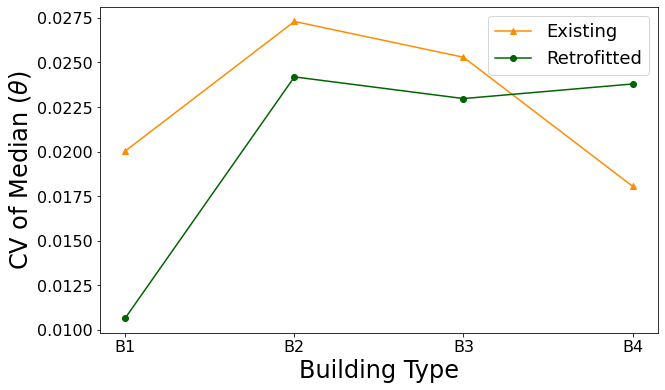

In [67]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'QCoV_$\theta$'][::2]
retrofit = MLEresult[r'QCoV_$\theta$'][1::2]

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x,existing, label = 'Existing', color = 'darkorange', marker = '^')
ax.plot(x,retrofit, label='Retrofitted', color = 'darkgreen', marker = 'o')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(r'CV of Median ($\theta$)', fontsize = 24)
ax.set_xlabel('Building Type', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(15)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('covthetaQMLEline.png')

In [68]:
# labels = ['B1', 'B2', 'B3', 'B4']

# existing = MLEresult[r'QCoV_$\theta$'][::2]
# retrofit = MLEresult[r'QCoV_$\theta$'][1::2]

# x = np.arange(len(labels))  # the label locations

# plt.figure(figsize = (10,6))

# plt.plot(x,existing, label = 'Existing', color = 'darkorange', marker = '^')
# plt.plot(x,retrofit, label='Retrofitted', color = 'darkgreen', marker = 'o')

# plt.ylabel(r'CV of Median ($\theta$)', fontsize = 24)
# plt.xlabel('Building Type', fontsize = 24)
# plt.xticks(x, labels)
# plt.tick_params(axis='both', which='major', labelsize=16)
# plt.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.legend(fontsize = 18)
# plt.savefig('covthetaQMLEline.png')

In [69]:
# labels = ['B1', 'B2', 'B3', 'B4']

# existing = MLEresult[r'QCoV_$\theta$'][::2]
# retrofit = MLEresult[r'QCoV_$\theta$'][1::2]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots(figsize = (10,6))
# rects1 = ax.bar(x - width/2, existing, width, label='Existing', color = 'orangered')
# rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted', color = 'royalblue')


# ax.set_ylabel(r'CV of Median ($\theta$)', fontsize = 22)
# ax.set_xlabel('Building Type', fontsize = 22)
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.yaxis.offsetText.set_fontsize(15)
# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=16)
# ax.legend(fontsize = 18)
# plt.savefig('covthetaQMLEbar.png')

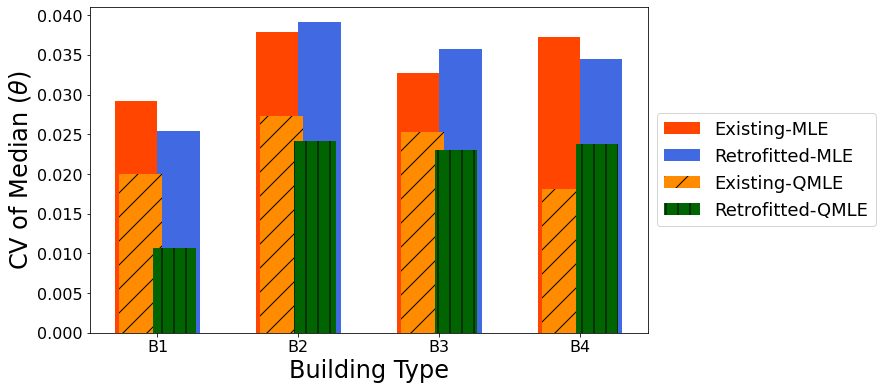

In [70]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'CoV_$\theta$'][::2]
retrofit = MLEresult[r'CoV_$\theta$'][1::2]

existingQMLE = MLEresult[r'QCoV_$\theta$'][::2]
retrofitQMLE = MLEresult[r'QCoV_$\theta$'][1::2]

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize = (10,6))
# ax.plot(x,existingQMLE, label = 'Existing', color = 'darkorange', marker = '^')
# ax.plot(x,retrofitQMLE, label='Retrofitted', color = 'darkgreen', marker = 'o')
width = 0.3
rects1 = ax.bar(x - width/2, existing, width, label='Existing-MLE', color = 'orangered')
rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted-MLE', color = 'royalblue')

width = 0.3
rects3 = ax.bar(x - width/2.5, existingQMLE, width, label='Existing-QMLE', color = 'darkorange', hatch = '/')
rects4 = ax.bar(x + width/2.5, retrofitQMLE, width, label='Retrofitted-QMLE', color = 'darkgreen', hatch = '|')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(r'CV of Median ($\theta$)', fontsize = 24)
ax.set_xlabel('Building Type', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(15)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18,bbox_to_anchor=(1, 0.5), loc='center left')
# plt.savefig('covthetaStacked.png')

### COV of lognormal standard deviation -QMLE

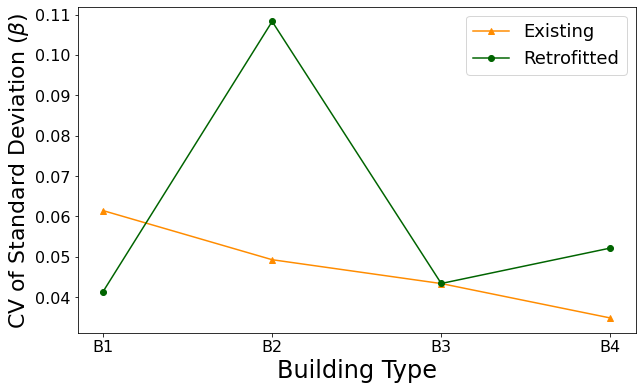

In [71]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'QCoV_$\beta$'][::2]
retrofit = MLEresult[r'QCoV_$\beta$'][1::2]

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x,existing, label = 'Existing', color = 'darkorange', marker = '^')
ax.plot(x,retrofit, label='Retrofitted', color = 'darkgreen', marker = 'o')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(r'CV of Standard Deviation ($\beta$)', fontsize = 22)
ax.set_xlabel('Building Type', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(15)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('covbetaQMLEline.png')

In [72]:
# labels = ['B1', 'B2', 'B3', 'B4']

# existing = MLEresult[r'QCoV_$\beta$'][::2]
# retrofit = MLEresult[r'QCoV_$\beta$'][1::2]

# x = np.arange(len(labels))  # the label locations

# plt.figure(figsize = (10,6))

# plt.plot(x,existing, label = 'Existing', color = 'darkorange', marker = '^')
# plt.plot(x,retrofit, label='Retrofitted', color = 'darkgreen', marker = 'o')

# plt.ylabel(r'CV of Standard Deviation ($\beta$)', fontsize = 22)
# plt.xlabel('Building Type', fontsize = 24)
# plt.xticks(x, labels)
# plt.tick_params(axis='both', which='major', labelsize=16)
# ax.yaxis.offsetText.set_fontsize(15)
# plt.legend(fontsize = 18)
# plt.savefig('covbetaQMLEline.png')

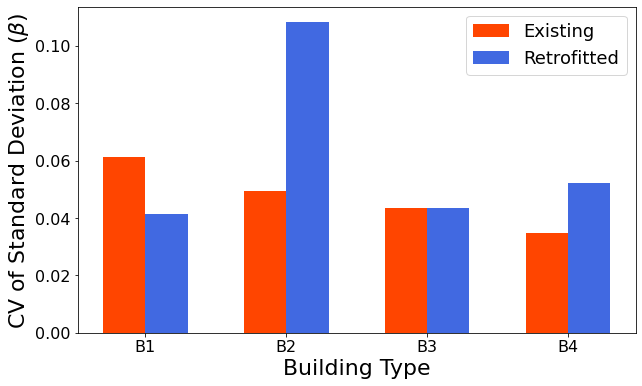

In [73]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'QCoV_$\beta$'][::2]
retrofit = MLEresult[r'QCoV_$\beta$'][1::2]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, existing, width, label='Existing', color = 'orangered')
rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted', color = 'royalblue')

ax.set_ylabel(r'CV of Standard Deviation ($\beta$)', fontsize = 22)
ax.set_xlabel('Building Type', fontsize = 22)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.offsetText.set_fontsize(15)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('covbetaQMLEbar.png')

### COV -  collapse rate - MLE 

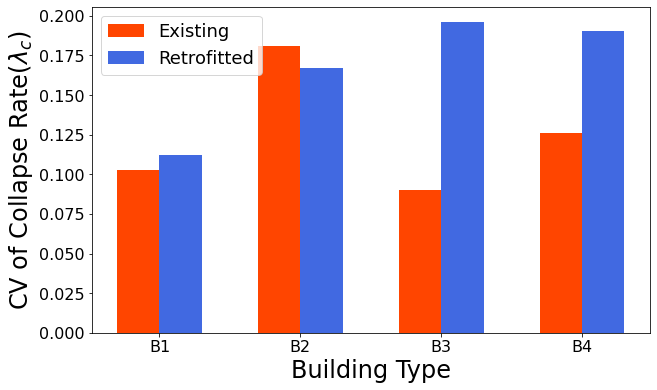

In [74]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'MLEStd[$\lambda_c$]'][::2]/MLEresult[r'MAFC($\lambda_c$)'][::2]
retrofit = MLEresult[r'MLEStd[$\lambda_c$]'][1::2]/MLEresult[r'MAFC($\lambda_c$)'][1::2]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, existing, width, label='Existing', color = 'orangered')
rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted', color = 'royalblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'CV of Collapse Rate($\lambda_c$)', fontsize = 24)
ax.set_xlabel('Building Type', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('covMLElambdac.png')

## Collapse rate estimate- MLE and QMLE

The median estimate of the MLE and QMLE is the same which is why the collapse rate is the same as well

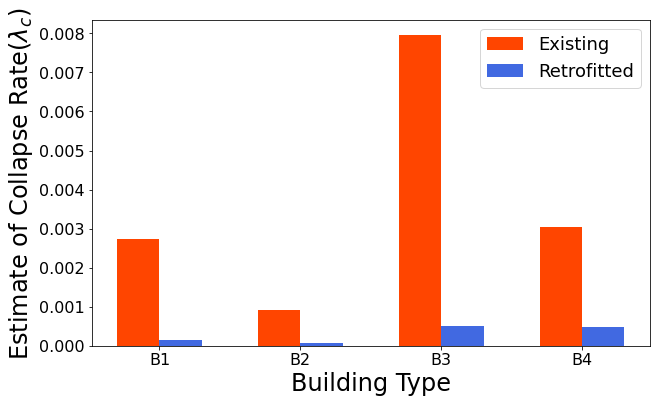

In [75]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'MAFC($\lambda_c$)'][::2]
retrofit = MLEresult[r'MAFC($\lambda_c$)'][1::2]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, existing, width, label='Existing', color = 'orangered')
rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted', color = 'royalblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Estimate of Collapse Rate($\lambda_c$)', fontsize = 24)
ax.set_xlabel('Building Type', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('MLElambdac.png')

### COV -  collapse rate - QMLE 

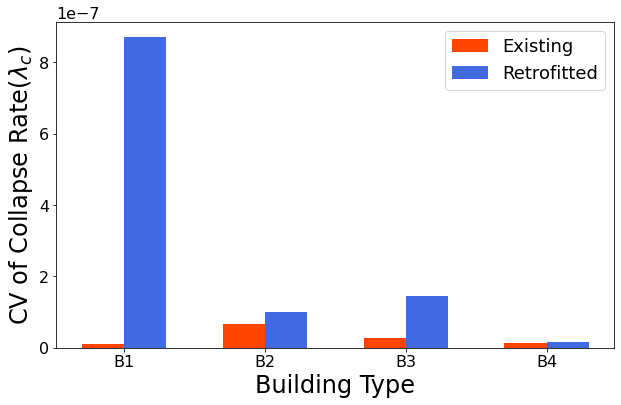

In [76]:
labels = ['B1', 'B2', 'B3', 'B4']

existing = MLEresult[r'QMLEStd[$\lambda_c$]'][::2]/MLEresult[r'MAFC($\lambda_c$)'][::2]
retrofit = MLEresult[r'QMLEStd[$\lambda_c$]'][1::2]/MLEresult[r'MAFC($\lambda_c$)'][1::2]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, existing, width, label='Existing', color = 'orangered')
rects2 = ax.bar(x + width/2, retrofit, width, label='Retrofitted', color = 'royalblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'CV of Collapse Rate($\lambda_c$)', fontsize = 24)
ax.set_xlabel('Building Type', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.offsetText.set_fontsize(16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18)
# plt.savefig('covQMLElambdac.png')

### Standard Deviation of collapse rate - Analytical vs Bootstrapping

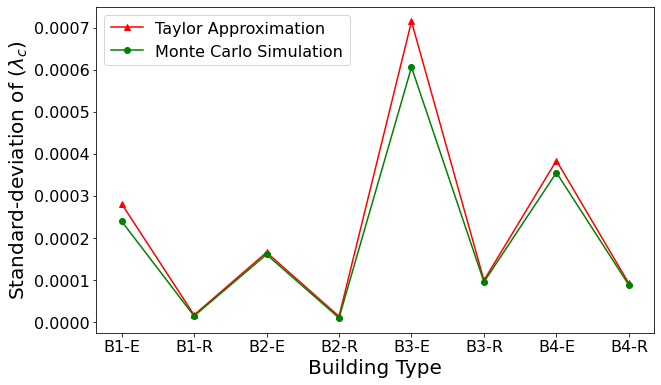

In [77]:
labels = ['B1-E','B1-R','B2-E','B2-R','B3-E','B3-R','B4-E','B4-R']
# existing = MLEresult[r'log-std($\beta$)'][::2]
# retrofit = MLEresult[r'log-std($\beta$)'][1::2]

# existing = MLEresult[r'CoV_$\beta$']
# retrofit = MLEresult[r'QCoV_$\beta$']

existing = MLEresult[r'MLEStd[$\lambda_c$]']
retrofit = np.sqrt(MLEresult[r'Var(lambdaCSimulated)'])


x = np.arange(len(labels))  # the label locations

plt.figure(figsize = (10,6))
# rects1 = ax.bar(x - width/2, existing, width, label='Analytical (Eq. 17)', color = 'orangered')
# rects2 = ax.bar(x + width/2, retrofit, width, label='Bootstrapping', color = 'royalblue')

plt.plot(x,existing, label = 'Taylor Approximation', color = 'red', marker = '^')
plt.plot(x,retrofit, label='Monte Carlo Simulation', color = 'green', marker = 'o')


plt.ylabel(r'Standard-deviation of ($\lambda_c$)', fontsize = 20)
plt.xlabel('Building Type', fontsize = 20)
plt.xticks(x, labels)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize = 16)
# plt.savefig('lambda_analytical_vs_bootstrap_line.png')

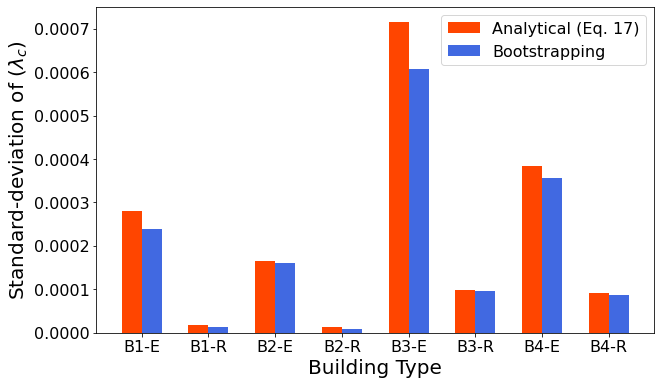

In [78]:
labels = ['B1-E','B1-R','B2-E','B2-R','B3-E','B3-R','B4-E','B4-R']
# existing = MLEresult[r'log-std($\beta$)'][::2]
# retrofit = MLEresult[r'log-std($\beta$)'][1::2]

# existing = MLEresult[r'CoV_$\beta$']
# retrofit = MLEresult[r'QCoV_$\beta$']

existing = MLEresult[r'MLEStd[$\lambda_c$]']
retrofit = np.sqrt(MLEresult[r'Var(lambdaCSimulated)'])


x = np.arange(len(labels))  # the label locations

plt.figure(figsize = (10,6))
plt.bar(x - width/2, existing, width, label='Analytical (Eq. 17)', color = 'orangered')
plt.bar(x + width/2, retrofit, width, label='Bootstrapping', color = 'royalblue')

# plt.plot(x,existing, label = 'Taylor Approximation', color = 'red', marker = '^')
# plt.plot(x,retrofit, label='Monte Carlo Simulation', color = 'green', marker = 'o')


plt.ylabel(r'Standard-deviation of ($\lambda_c$)', fontsize = 20)
plt.xlabel('Building Type', fontsize = 20)
plt.xticks(x, labels)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize = 16)
# plt.savefig('lambda_analytical_vs_bootstrap_bar.png')

In [79]:
# s_theta = np.random.normal(theta, np.sqrt(Var_theta), 10000)
# s_beta = np.random.normal(beta, np.sqrt(Var_beta), 10000)

# fig, (ax1, ax2) = plt.subplots(1,2)
# fig.set_figheight(7)
# fig.set_figwidth(14)
# count, bins, ignored = ax1.hist(s_theta, 30, density=True, histtype = 'step')
# ax1.plot(bins, 1/(np.sqrt(Var_theta) * np.sqrt(2 * np.pi)) * np.exp( - (bins - theta)**2 / (2 * Var_theta) ),
#          linewidth=3, color='r')
# ax1.title.set_text(r'Dispersion in $\theta$')
# count, bins, ignored = ax2.hist(s_beta, 30, density=True, histtype = 'step')
# ax2.plot(bins, 1/(np.sqrt(Var_beta) * np.sqrt(2 * np.pi)) * np.exp( - (bins - beta)**2 / (2 * Var_beta) ),
#          linewidth=3, color='r')
# # ax2.plot(bins, norm.pdf())
# ax2.title.set_text(r'Dispersion in $\beta$')
# plt.show()

In [80]:
numCount1 = np.array(df['B2-Existing'])
trial = MaximumLikelihoodMethod(hazardLevel, numCount1, numGM, rate)
trial.theta

array([2.38116588, 0.57175945])

In [81]:
trial.A

array([[-122.75729289,    5.50523365],
       [   5.50523365, -638.98305708]])

In [82]:
trial.score_erf

array([[ 63.60399301, -14.19520186],
       [-14.19520186, 324.09241377]])

In [83]:
trial.vcov_erf

array([[8.14930426e-03, 7.02112889e-05],
       [7.02112889e-05, 1.56559164e-03]])

In [84]:
trial.sandwich

array([[ 4.22401495e-03, -6.99770232e-08],
       [-6.99770232e-08,  7.94375516e-04]])

In [85]:
from scipy.stats import norm

norm.ppf(0.975)

1.959963984540054

In [86]:
glmClass = GLMProbitClass(hazardLevel, numCount1, numGM, rate, varType='observedHessian')

In [87]:
glmClass.sandwich

array([[2.67738988e-16, 1.25242726e-15],
       [1.25242726e-15, 1.16249537e-14]])

In [88]:
trial = MaximumLikelihoodMethod(hazardLevel, numCount1, numGM, rate)
trial.theta

array([2.38116588, 0.57175945])

In [89]:
trial.theta

array([2.38116588, 0.57175945])

In [90]:
params = trial.GLMmodel.fit.params
vcov = trial.GLMmodel.vcov
vcov

,Intercept,logIM
Intercept,0.015031,-0.012385
logIM,-0.012385,0.014438


In [91]:
theta = np.exp(-params[0]/params[1])
beta = 1/params[1]
print(theta)
print(beta)

2.3811433806485196
0.5717505631272447


In [92]:
params

Intercept   -1.517411
logIM        1.749014
dtype: float64

In [93]:
vcov

,Intercept,logIM
Intercept,0.015031,-0.012385
logIM,-0.012385,0.014438


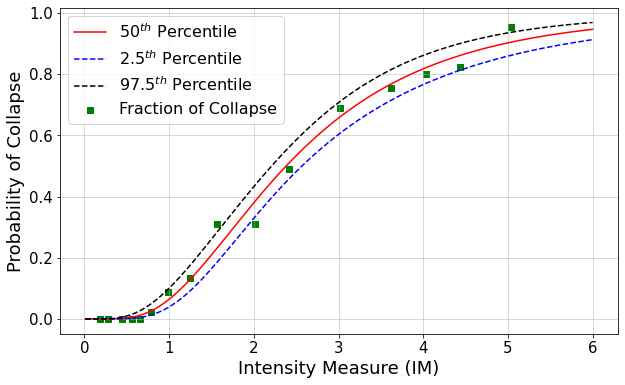

In [94]:
x = np.linspace(0.01,6,205)

meanEta = params[0] + params[1] * np.log(x)
varEta = vcov['Intercept'][0] + vcov['logIM'][1] * np.log(x)**2 + 2 * vcov['Intercept'][1] * np.log(x)

stdEta = np.sqrt(varEta)

muPc = norm.cdf(meanEta)
muPc_upper = norm.cdf(norm.ppf(0.975)*np.sqrt(varEta) + meanEta)
muPc_lower = norm.cdf(norm.ppf(0.025)*np.sqrt(varEta) + meanEta)

plt.figure(figsize = (10,6))
plt.plot(x, muPc, color = 'red' , label = r'$50^{th}$ Percentile' )
plt.plot(x, muPc_lower, color = 'blue',linestyle='dashed', label = r'$2.5^{th}$ Percentile' )
plt.plot(x, muPc_upper, color = 'black',linestyle='dashed', label = r'$97.5^{th}$ Percentile' )
plt.scatter(hazardLevel, numCount1/numGM, color = 'green', marker = 's', label = 'Fraction of Collapse')

# plt.scatter(hazardLevel, numCount1/numGM, color = 'green', marker = 's', label = 'Fraction of Collapse')
# plt.title('Collapse Fragility: 1L-S2-G2-2C-S2-EX')
plt.xlabel('Intensity Measure (IM)', fontsize = 18)
plt.ylabel('Probability of Collapse', fontsize = 18)
plt.legend(fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid(linewidth = 0.5)
# plt.savefig('ConfidenceInterval.png')

In [95]:
varcov = trial.vcov_erf
varcov

array([[8.14930426e-03, 7.02112889e-05],
       [7.02112889e-05, 1.56559164e-03]])

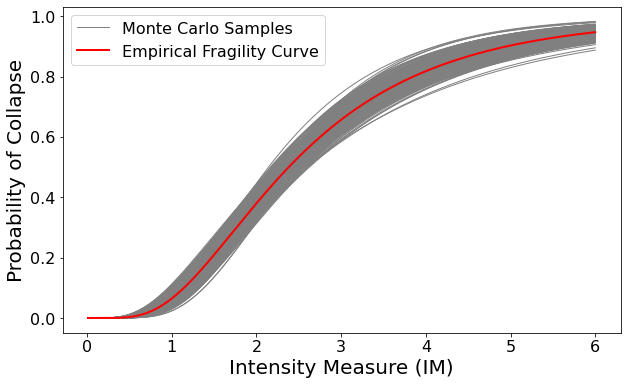

In [96]:
cs = CubicSpline(hazardLevel, rate)
lambdaRange = cs(x)

numSamples = 500 
period = 50 

def CollapseRateGLM(x, beta0, beta1, lambdaRange, period):
    lambdaCollapse_Sa = []
    for i in range(len(x)-1):
        midIM = (x[i] + x[i+1])/2
        pc = norm.cdf(beta0 + beta1 * np.log(midIM))
        lamC = pc * np.abs(lambdaRange[i] - lambdaRange[i+1]) 

        lambdaCollapse_Sa.append(lamC)
    
    meanLambdaCollapse_Sa = np.sum(lambdaCollapse_Sa)
    samplePc = 1 - np.exp(-50 * meanLambdaCollapse_Sa)

    return meanLambdaCollapse_Sa, samplePc

def CollapseRateMLE(x, theta, beta, lambdaRange, period):
    lambdaCollapse_Sa = []
    for i in range(len(x)-1):
        midIM = (x[i] + x[i+1])/2
        pc = norm.cdf(np.log(midIM), loc = np.log(theta), scale = beta)
        lamC = pc * np.abs(lambdaRange[i] - lambdaRange[i+1]) 

        lambdaCollapse_Sa.append(lamC)
    
    meanLambdaCollapse_Sa = np.sum(lambdaCollapse_Sa)
    samplePc = 1 - np.exp(-50 * meanLambdaCollapse_Sa)

    return meanLambdaCollapse_Sa, samplePc


lambdaCollapsehist = []
samplePc_hist = []


plt.figure(figsize = (10,6))
for i in range(numSamples): 

#     sampleBeta0, sampleBeta1 = np.random.multivariate_normal(np.array(fit.params), np.array(fit.cov_params())).T
    sampleBeta0, sampleBeta1 = np.random.multivariate_normal(np.array([theta, beta]), varcov).T
    
    sampleLambdaCollapse, samplePc = CollapseRateGLM(x, sampleBeta0, sampleBeta1, lambdaRange, period ) 
    plt.plot(x, norm.cdf(np.log(x), loc = np.log(sampleBeta0), scale = sampleBeta1), color = 'grey', linewidth = 1)
    if i == numSamples-1: 
        plt.plot(x, norm.cdf(np.log(x), loc = np.log(sampleBeta0), scale = sampleBeta1), color = 'grey', 
                 linewidth = 1, label = 'Monte Carlo Samples')
    
#     sampleLambdaCollapse, samplePc = CollapseRateMLE(x, sampleBeta0, sampleBeta1, lambdaRange, period ) 
#     plt.plot(x, norm.cdf(sampleBeta0 + sampleBeta1*np.log(x)), color = 'grey', linewidth = 1)
    
    lambdaCollapsehist.append(sampleLambdaCollapse)
    samplePc_hist.append(samplePc)
    
# plt.plot(x, norm.cdf(fit.params[0] + fit.params[1]*np.log(x)), color = 'red', linewidth = 2)

plt.plot(x, norm.cdf(np.log(x), loc = np.log(theta), scale = beta), color = 'red', 
         linewidth = 2, label = 'Empirical Fragility Curve')
plt.xlabel('Intensity Measure (IM)', fontsize = 20)
plt.ylabel('Probability of Collapse', fontsize = 20)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=16)
# plt.grid(linewidth = 0.5)
plt.legend(fontsize = 16)
# plt.savefig('MonteCarloSimulation.png')